In [35]:
from skimage.io import imread,imsave,imshow
from matplotlib import pyplot as plt 
import numpy as np 

watermark_binary_src = imread('watermark.png')
watermark_binary= watermark_binary_src>0


# watermark from https://www.kissclipart.com/draft-stamp-png-clipart-postage-stamps-clip-art-qwnjk9/
watermark_color_src = imread('watermark_color.jpg')
watermark_color = watermark_color_src[:,:,2]
watermark_color = watermark_color < 10 # only the dark pixels are kept 

image =imread('sky.jpg') 

X=50
Y=50

def get_brightness(image): 
    return np.mean(image)/255

def get_indexes(image , watermark):
    
    watermark_h_half = Y
    watermark_w_half = X
    
    watermark_h= watermark.shape[0]
    watermark_w = watermark.shape[1]
    
    image_h = image.shape[0]//2
    image_w = image.shape[1]//2

    middle_point_h_begin = image_h - watermark_h_half
    middle_point_w_begin= image_w - watermark_w_half
    
    
    # ensure that the border
    if(middle_point_h_begin<0): middle_point_h_begin = 0 
    if(middle_point_w_begin<0): middle_point_w_begin = 0
        
    return middle_point_h_begin,middle_point_w_begin

    
def apply_mask(image_src,watermark,brightness, original_img, apply_src):
    image = image_src.copy()
    y1,x1= get_indexes(image, watermark)    
    for y in range(watermark.shape[0]):
        for x in range(watermark.shape[1]):
            if watermark[y][x]:
                try :
                    if apply_src : color = original_img[y][x]
                    else: color = image[y+y1][x+x1]
                    image[y+y1][x+x1] = color * brightness
                except IndexError: 
                    continue
    return(image)

In [36]:
brightness = get_brightness(image)
# colored watermark 
marked_color_image_src = apply_mask(image , watermark_color, brightness,watermark_color_src, True)
marked_color_image = apply_mask(image , watermark_color, brightness,watermark_color_src, False)

# non-colored watermark 
marked_binary_image_src = apply_mask(image , watermark_binary, brightness,watermark_binary_src, True)
marked_binary_image = apply_mask(image , watermark_binary, brightness,watermark_binary_src, False)

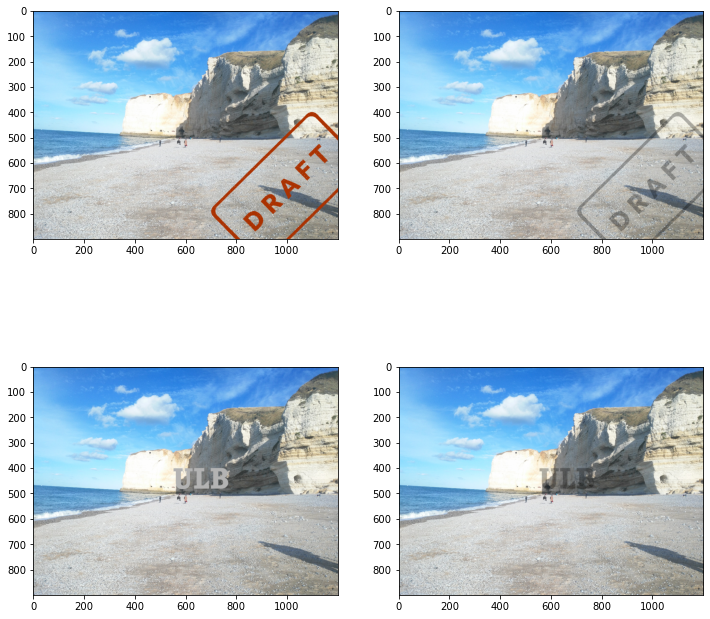

In [37]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(marked_color_image_src)
plt.subplot(2,2,2)
plt.imshow(marked_color_image)
plt.subplot(2,2,3)
plt.imshow(marked_binary_image_src)
plt.subplot(2,2,4)
plt.imshow(marked_binary_image)
plt.show()